# 質量吸収係数

In [1]:
lam = 1.54E-10  # m 波長

In [2]:
import math

In [3]:
# 定数
C_H = 0.0127
D_H = 0.466E-5
Z_H = 1
M_H = 1.00794

C_C = 1.22
D_C = 0.0142
Z_C = 6
M_C = 12.011

C_N = 2.05
D_N = 0.0317
Z_N = 7
M_N = 14.00674

C_O = 3.18
D_O = 0.0654
Z_O = 8
M_O = 15.9994

In [4]:
# コンプトン散乱の計算
sigma_T = 6.7E-25  # cm^2
h = 6.626E-34  # J*s プランク定数
c = 3E8  # m/s 光速
E = h * c / lam  # J エネルギー
E_eV = E / 1.6E-19  # keV エネルギー
E_keV = E_eV / 1E3  # keV エネルギー
alpha = E_keV / 511

term1 = (1 + alpha) / alpha**2
term2 = (2 * (1 + alpha) / (1 + 2 * alpha)) - (math.log(1 + 2 * alpha) / alpha)
term3 = math.log(1 + 2 * alpha) / (2 * alpha)
term4 = (1 + 3 * alpha) / (1 + 2 * alpha)**2

sigma_c = sigma_T * (3 / 4) * (term1 * term2 + term3 - term4)

In [5]:
# 各物質の定数
N_A = 6.022E23  # mol^-1 アボガドロ数
N_rho_H = N_A * Z_H / M_H  # 電子密度 (mol/cm^3)
N_rho_C = N_A * Z_C / M_C  # 電子密度 (mol/cm^3)
N_rho_N = N_A * Z_N / M_N  # 電子密度 (mol/cm^3)
N_rho_O = N_A * Z_O / M_O  # 電子密度 (mol/cm^3)

In [6]:
# 質量吸収係数 Victoreen's equation
# mu_rho = C * lam^3 - D * lam^4 + N_rho * sigma_c
lam_A = lam * 1E10  # Angstrom
mu_rho_H = C_H * lam_A**3 - D_H * lam_A**4 + N_rho_H * sigma_c
mu_rho_C = C_C * lam_A**3 - D_C * lam_A**4 + N_rho_C * sigma_c
mu_rho_N = C_N * lam_A**3 - D_N * lam_A**4 + N_rho_N * sigma_c
mu_rho_O = C_O * lam_A**3 - D_O * lam_A**4 + N_rho_O * sigma_c

# results
print(f"波長: {lam} m")
print(f"エネルギー: {E_keV:.2f} keV")
print(f"μ(H): {mu_rho_H:.2f} cm^2/g")
print(f"μ(C): {mu_rho_C:.2f} cm^2/g")
print(f"μ(N): {mu_rho_N:.2f} cm^2/g")
print(f"μ(O): {mu_rho_O:.2f} cm^2/g")

波長: 1.54e-10 m
エネルギー: 8.07 keV
μ(H): 0.43 cm^2/g
μ(C): 4.57 cm^2/g
μ(N): 7.50 cm^2/g
μ(O): 11.44 cm^2/g


In [7]:
# PEEK C19H12O3
PEEK_total = 19 * M_C + 12 * M_H + 3 * M_O
PEEK_C = 19 * M_C / PEEK_total
PEEK_H = 12 * M_H / PEEK_total
PEEK_O = 3 * M_O / PEEK_total

PEEK_rho = 1.3  # g/cm^3

PEEK_mu_rho = PEEK_C * mu_rho_C + PEEK_H * mu_rho_H + PEEK_O * mu_rho_O
PEEK_mu = PEEK_mu_rho * PEEK_rho  # cm^-1

print(f"PEEK μ: {PEEK_mu:.2f} cm^-1")

PEEK μ: 7.20 cm^-1


In [8]:
# jER (C18H20O3)nC21H23O4
jER_cycle = M_C * 18 + M_H * 20 + M_O * 3
jER_base = M_C * 21 + M_H * 23 + M_O * 4

jER_weight = 370  # g/mol

n = (jER_weight - jER_base) / jER_cycle  # 繰り返し単位数
print(f"jER n: {n:.2f}")

jER n: 0.11


In [9]:
# DDM C13H14N2

In [10]:
# EP = 2 * jER + DDM
EP_total = 2 * jER_weight + 13 * M_C + 14 * M_H + 2 * M_N
EP_C = (2 * (18 * n + 21) + 13) * M_C / EP_total
EP_H = (2 * (20 * n + 23) + 14) * M_H / EP_total
EP_N = 2 * M_N / EP_total
EP_O = 2 * (3 * n + 4) * M_O / EP_total

EP_rho = 1.19  # g/cm^3

EP_mu_rho = EP_C * mu_rho_C + EP_H * mu_rho_H + EP_N * mu_rho_N + EP_O * mu_rho_O
EP_mu = EP_mu_rho * EP_rho  # cm^-1

print(f"EP μ: {EP_mu:.2f} cm^-1")

EP μ: 6.41 cm^-1


# SPring-8

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [12]:
def depth(alpha, phi, twotheta, EP=False, EP_tickness=200):
    """
    alpha: 入射角 (deg)
    phi: 方位角 (deg)
    twotheta: 2theta (deg)
    EP: EPの時はTrueを指定
    EP_tickness: EPの厚さ (um)
    """

    EP_tickness = EP_tickness * 1e-4  # cm

    alpha = math.radians(alpha)
    phi = math.radians(phi)
    twotheta = math.radians(twotheta)

    term1 = 1 / math.sin(alpha)
    term2 = math.sin(twotheta) * math.cos(alpha) * math.sin(phi)
    term3 = math.cos(twotheta) * math.sin(alpha)
    term4 = 1 / (term2 - term3)
    term5 = term1 + term4

    if EP:
        # EPの時はPEEKとEPの質量吸収係数を考慮する
        T = 1 / EP_mu / term5
        if T > EP_tickness:
            T = (1 - 0.02 * (EP_mu - PEEK_mu) * term5) / PEEK_mu / term5

    else:
        # PEEKの時はPEEKの質量吸収係数を考慮する
        T = 1 / PEEK_mu / term5

    return T

In [13]:
# ψ角の導出
def get_psi_angle(theta, alpha, phi):
    cos_psi = math.sin(math.radians(theta)) * math.sin(math.radians(alpha)) + math.sin(math.radians(phi)) * math.cos(math.radians(theta)) * math.cos(math.radians(alpha))
    psi = math.acos(cos_psi)
    return math.degrees(psi)

In [15]:
from tkinter import filedialog

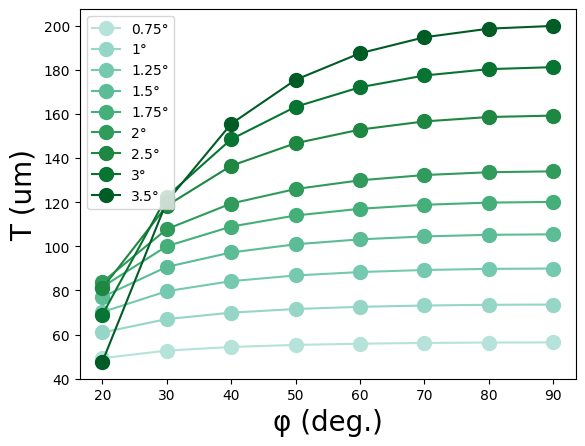

In [60]:
# svg
plt.rcParams["svg.fonttype"] = "none"  # svgフォントをアウトライン化しない
alphas = [0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5]
phis = [20, 30, 40, 50, 60, 70, 80, 90]
for i, alpha in enumerate(alphas):
    T = [depth(alpha, phi, 12.2)*10000 for phi in phis]
    plt.plot(phis, T, label=f"{alpha}°", marker="o", markersize=10, color=cm.BuGn((i+4)/(len(alphas)+4)))

plt.xlabel("φ (deg.)", fontsize=20)
plt.ylabel("T (um)", fontsize=20)
plt.legend()
plt.savefig(filedialog.asksaveasfilename(defaultextension=".svg", filetypes=[("SVG files", "*.svg")]), bbox_inches="tight")

C:\Users\uttya\AppData\Local\Temp\ipykernel_18464\3177672710.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(sin2psi, T*1E4, c=plt.get_cmap('BuGn')(np.linspace(0, 1, 9)[i])
C:\Users\uttya\AppData\Local\Temp\ipykernel_18464\3177672710.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(sin2psi, T*1E4, c=plt.get_cmap('BuGn')(np.linspace(0, 1, 9)[i])


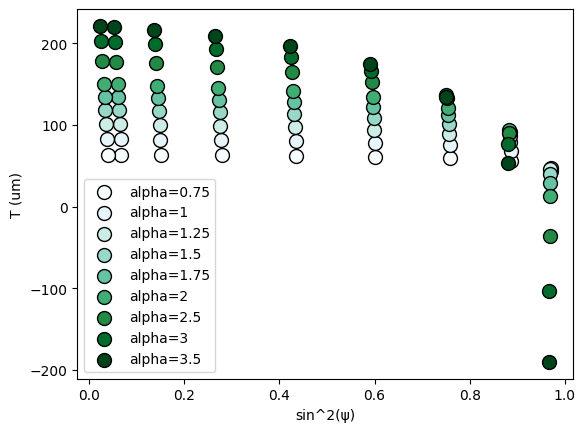

In [19]:
for i, alpha in enumerate([0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5]):
    for phi in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
        T = depth(alpha, phi, 12.2, EP=True)
        psi = get_psi_angle(12.2, alpha, phi)
        sin2psi = math.sin(math.radians(psi))**2
        if phi == 10:
            plt.scatter(sin2psi, T*1E4, c=plt.get_cmap('BuGn')(np.linspace(0, 1, 9)[i])
            , edgecolors='black', label=f"alpha={alpha}", s=100)
        else:
            plt.scatter(sin2psi, T*1E4, c=plt.get_cmap('BuGn')(np.linspace(0, 1, 9)[i])
            , edgecolors='black', s=100)

plt.xlabel("sin^2(ψ)")
plt.ylabel("T (um)")

plt.legend()

# plt.savefig("temp/SP8.svg")

# SmartLab

In [11]:
def depth_SmartLab(twotheta, psi):
    """"
    twotheta: 2theta (deg)
    psi: psi (deg)
    """
    twotheta = np.radians(twotheta)
    theta = twotheta / 2
    psi = np.radians(psi)

    T = math.sin(theta) * math.cos(psi) / (2 * PEEK_mu)

    return T  # cm

In [16]:
from tkinter import filedialog
from matplotlib import pyplot as plt
import numpy as np

87.6139742085007


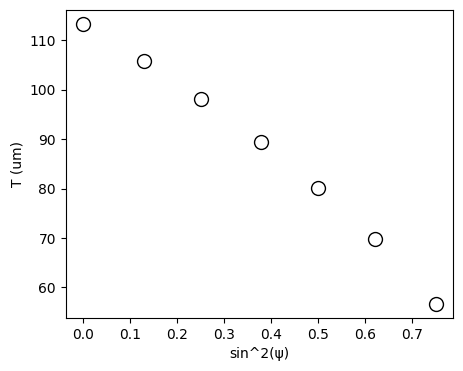

In [19]:
plt.rcParams["svg.fonttype"] = "none"  # svgフォントをアウトライン化しない

fig = plt.figure(figsize=(5, 4))

Ts = []

for psi in [0, 21, 30, 38, 45, 52, 60]:
    T = depth_SmartLab(18.8, psi)
    sin2psi = math.sin(math.radians(psi))**2
    plt.scatter(sin2psi, T*1E4, color='white', edgecolors='black', s=100)
    Ts.append(T*1E4)

plt.xlabel("sin^2(ψ)")
plt.ylabel("T (um)")

print(np.mean(Ts))

# plt.savefig(filedialog.asksaveasfilename(defaultextension=".svg", filetypes=[("SVG files", "*.svg")]), bbox_inches="tight")